In [2]:
from sklearn.linear_model import LogisticRegression

lr_height = LogisticRegression(max_iter=1000, random_state=42)


In [12]:
import pandas as pd
import numpy as np
data = pd.read_csv('phylogeny.csv')
dicc = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
encoded_sequences = []
for sequence in data['sequences']:
    encoded_sequence = np.array([dicc[nucleotide] for nucleotide in sequence])
    encoded_sequences.append(encoded_sequence)
encoded_data = pd.DataFrame(encoded_sequences)
encoded_data = pd.concat([data, encoded_data], axis=1)
encoded_data.to_csv("encoded.csv")
print(encoded_data)


     Cluster ID cultivar id subpopulation  sequences  mean_height  0  1  2  3   
0             1        C001        Indica  GCTTTTCCC      138.265  3  2  1  1  \
1             1        W261  Intermediate  GCTTTTCCC      138.265  3  2  1  1   
2             2        W306   VI/Aromatic  GCTGTTCCC      129.600  3  2  1  3   
3             3        C128        Indica  GCTTTTTCC      156.070  3  2  1  1   
4             3        C180        Indica  GCTTTTTCC      156.070  3  2  1  1   
..          ...         ...           ...        ...          ... .. .. .. ..   
523          73        W071        Indica  GCCGTATTT      117.345  3  2  2  3   
524          73        W146        Indica  GCCGTATTT      117.345  3  2  2  3   
525          73        W178        Indica  GCCGTATTT      117.345  3  2  2  3   
526          73        W221        Indica  GCCGTATTT      117.345  3  2  2  3   
527          73        W310        Indica  GCCGTATTT      117.345  3  2  2  3   

     4  5  6  7  8  
0    1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
encoded_data = pd.read_csv('encoded.csv')
X = encoded_data.iloc[:, 6:].values
y_subpopulation = encoded_data['subpopulation'].values
y_height = encoded_data['mean_height'].values
X_train, X_test, y_subpopulation_train, y_subpopulation_test, y_height_train, y_height_test = train_test_split(X, y_subpopulation, y_height, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_subpopulation_train)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_height_train)
new_seq = input("Enter DNA sequence: ")
print(new_seq)
new_seq_encoded = np.array([dicc[nucleotide] for nucleotide in new_seq])
new_seq_encoded = new_seq_encoded.reshape(1, -1)
predicted_subpopulation = rf_classifier.predict(new_seq_encoded)
predicted_height = rf_regressor.predict(new_seq_encoded)
print("Predicted subpopulation:", predicted_subpopulation)
print("Predicted height:", predicted_height)


ACTGTACTT
Predicted subpopulation: ['Temperate']
Predicted height: [99.38333333]


In [ ]:
accuracy = accuracy_score(y_subpopulation_test, rf_classifier.predict(X_test))
print("Accuracy:", accuracy)


Accuracy: 0.8490566037735849


In [ ]:
r2_score = rf_regressor.score(X_test, y_height_test)
print("R-squared score:", r2_score)


R-squared score: 0.945668579924902


In [ ]:

encoded_data = pd.read_csv('encoded.csv')
X = encoded_data.iloc[:, 6:].values 
y = encoded_data['subpopulation'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
new_seq = input("DNA sequence: ")
print(new_seq)
new_seq_encoded = [dicc[nucleotide] for nucleotide in new_seq]
new_seq_encoded = np.array(new_seq_encoded).reshape(1, -1)  
predicted_subpopulation = rf_classifier.predict(new_seq_encoded)
print("Predicted subpopulation:", predicted_subpopulation)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", str(round(accuracy*100,2))+"%")


CCCCCCCCC
Predicted subpopulation: ['VI/Aromatic']
Accuracy: 0.8490566037735849


In [6]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
data = pd.read_csv('phylogeny.csv')
dicc = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
encoded_sequences = []
for sequence in data['sequences']:
    encoded_sequence = np.array([dicc[nucleotide] for nucleotide in sequence])
    encoded_sequences.append(encoded_sequence)
encoded_data = pd.DataFrame(encoded_sequences)
encoded_data = pd.concat([data, encoded_data], axis=1)
encoded_data.to_csv("encoded.csv")
encoded_data = pd.read_csv('encoded.csv')
X = encoded_data.iloc[:, 6:].values
y_subpopulation = encoded_data['subpopulation'].values
y_height = encoded_data['mean_height'].values
X_train, X_test, y_subpopulation_train, y_subpopulation_test, y_height_train, y_height_test = train_test_split(X, y_subpopulation, y_height, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_subpopulation_train)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_height_train)
new_seq = input("Enter DNA sequence: ")
print(new_seq)
new_seq_encoded = np.array([dicc[nucleotide] for nucleotide in new_seq])
new_seq_encoded = new_seq_encoded.reshape(1, -1)
predicted_subpopulation = rf_classifier.predict(new_seq_encoded)
predicted_height = rf_regressor.predict(new_seq_encoded)
print("Predicted subpopulation:", predicted_subpopulation)
print("Predicted height:", predicted_height)
with open("rf_model.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)


ATGGCTGTT
Predicted subpopulation: ['Intermediate']
Predicted height: [160.17124211]


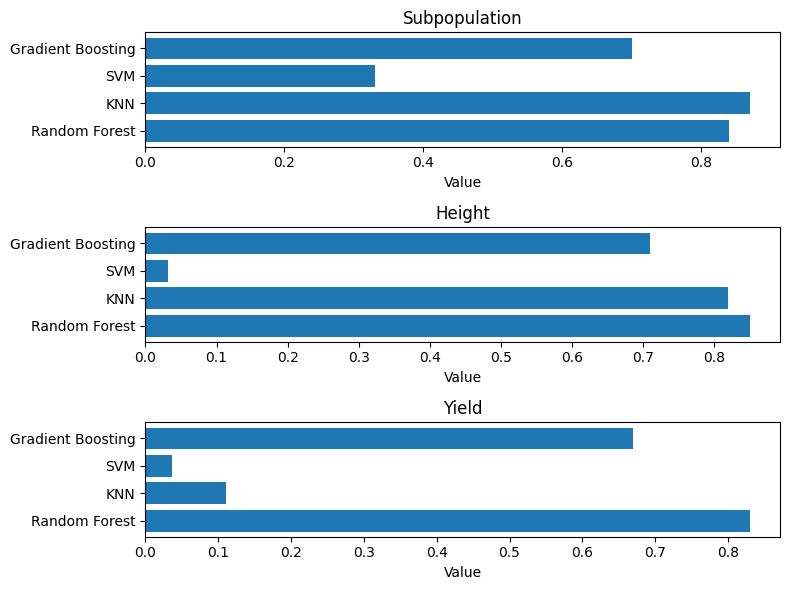

In [7]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Random Forest', 'KNN', 'SVM', 'Gradient Boosting']
subpopulation = [0.84, 0.87, 0.33, 0.70]
height = [0.85, 0.82, 0.031, 0.71]
yield_data = [0.83, 0.11, 0.036, 0.67]


y_pos = np.arange(len(models))


fig, axs = plt.subplots(3, 1, figsize=(8, 6))


axs[0].barh(y_pos, subpopulation, align='center')
axs[0].set_title('Subpopulation')
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(models)
axs[0].set_xlabel('Value')


axs[1].barh(y_pos, height, align='center')
axs[1].set_title('Height')
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(models)
axs[1].set_xlabel('Value')

axs[2].barh(y_pos, yield_data, align='center')
axs[2].set_title('Yield')
axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(models)
axs[2].set_xlabel('Value')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_subpopulation_train)
predicted_subpopulation_knn = knn_classifier.predict(new_seq_encoded)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_height_train)
predicted_height_knn = knn_regressor.predict(new_seq_encoded)
accuracy_knn = accuracy_score(y_subpopulation_test, knn_classifier.predict(X_test))
print("KNN Classification Accuracy:", accuracy_knn)
r2_score_knn = knn_regressor.score(X_test, y_height_test)
print("KNN Regression R-squared score:", r2_score_knn)


KNN Classification Accuracy: 0.8207547169811321
KNN Regression R-squared score: 0.8798230049154304


In [9]:
from sklearn.svm import SVC, SVR


svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_subpopulation_train)
predicted_subpopulation_svm = svm_classifier.predict(new_seq_encoded)


svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_height_train)
predicted_height_svm = svm_regressor.predict(new_seq_encoded)

accuracy_svm = accuracy_score(y_subpopulation_test, svm_classifier.predict(X_test))
print("SVM Classification Accuracy:", accuracy_svm)

r2_score_svm = svm_regressor.score(X_test, y_height_test)
print("SVM Regression R-squared score:", r2_score_svm)


SVM Classification Accuracy: 0.839622641509434
SVM Regression R-squared score: 0.7815347366833316
